In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from glob import glob

In [16]:
with open(glob("training_results_1123/openaigym.episode_batch*")[0]) as f:
    gym_dict = json.load(f)
gym_dict.pop("episode_types")
initial_reset_timestamp = gym_dict.pop("initial_reset_timestamp")

df = pd.DataFrame(gym_dict)
df["timestamps"] = df["timestamps"] - initial_reset_timestamp


In [20]:
# Filter outliers
outliers = (df["episode_rewards"] > -100,000)[0]
# print(outliers[0])
df = df[outliers]

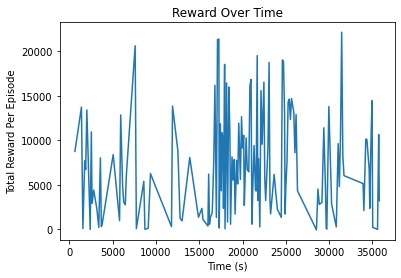

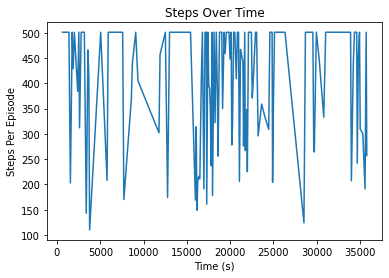

In [21]:
plt.figure()
plt.plot(df["timestamps"], df["episode_rewards"])
plt.xlabel("Time (s)")
plt.ylabel("Total Reward Per Episode")
plt.title("Reward Over Time")

plt.figure()
plt.plot(df["timestamps"], df["episode_lengths"])
plt.xlabel("Time (s)")
plt.ylabel("Steps Per Episode")
plt.title("Steps Over Time")

plt.show()